In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'AAPL'
# ticker = 'AAPL'


''' время '''
stime='1990-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

''' для фильтрации'''
filt_start_date = '2003'
filt_finish_date = '2022'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,AAPL
Date,
2022-11-01 00:00:00-04:00,147.784851
2022-12-01 00:00:00-05:00,129.929993
2023-01-01 00:00:00-05:00,141.860001


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,AAPL
Date_index,
1990-01-01,0.241775
1990-02-01,0.241775
1990-03-01,0.287141


In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2423475620080.514648,2519898620080.514648,24.282593,6.145837,19.839998,21.746324,47.826721,47.826721,6.390362,18.926968,20.629374,22.611547,0.041182,0.045985,1.952933,0.856354,0.724234,0.879356,40.749574,1.223921,0.006124,0.148703,0,0.066571,0,-0.087662,-0.027155,-0.964337,0.02292,20.801964,0.600871,0.282924,-12.679296,-18577000000,None,-166678000000,2.369533,56219000000,59439000000,5763000000,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337
2021,FY,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.152799,0,0.059904,0,-0.106548,-0.030302,-0.982364,0.021612,21.950838,0.483099,0.269742,-10.978415,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,51.390969,93.851071,11.276593,7.102415,3.88914,32.367933,1.500713,-0.663722
2020,FY,15.820258,3.308587,4.64923,4.228014,5.241031,3.765477,3.765477,3.765477,6.64524,1996361344741.568848,2070781344741.568848,34.773151,7.272322,24.746031,27.211359,30.553901,30.553901,7.543418,25.558891,25.66851,28.225739,0.028758,0.036749,1.510078,0.798267,0.918539,1.363604,23.072746,1.405201,0.007053,0.245267,0,0.06831,0,-0.090599,-0.026625,-0.661089,0.024877,16.742586,0.303383,0.177256,-7.923629,38321000000,None,-114836000000,1.72081,44475500000,48529500000,5320500000,49.787534,91.04819,8.741883,7.331152,4.008866,41.753016,0.878664,-0.421217


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()
# index_years


In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr.drop('period', axis=1, inplace=True)

# df_key_metr.head(3)

financial_rations

In [11]:
df_fin_rat = fa.financial_ratios(ticker, api_key, period='annual')
df_fin_rat = df_fin_rat.T
df_fin_rat.head(3)

,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2022,FY,0.879356,0.709408,0.153563,56.400205,8.075698,64.475903,104.685277,-40.209374,0.433096,0.302887,0.30204,0.253096,0.162045,0.282924,1.969589,0.600871,0.837955,0.997204,0.302887,0.856354,5.961537,0.661354,0.703223,40.749574,1.01734,6.961537,6.471608,3.486641,45.197331,9.36268,1.117852,7.532763,6.872426,2.978793,0.148703,0.30977,0.912338,1.01734,5.786405,-11.407452,29.555045,0.148703,47.826721,47.826721,6.145837,24.282593,21.746324,19.839998,19.839998,2.868381,6.145837,0.006124,18.926968,47.826721
2021,FY,1.074553,0.90966,0.278449,51.390969,11.276593,62.667561,93.851071,-31.18351,0.417794,0.297824,0.298529,0.258818,0.133023,0.269742,1.500713,0.483099,0.866977,1.002368,0.297824,0.820257,4.563512,0.633615,0.664074,41.190548,0.834179,5.563512,7.102415,3.88914,32.367933,9.275279,1.042208,6.229346,5.565624,3.750553,0.152799,0.284399,0.893452,0.834179,6.66355,-9.385476,30.762271,0.152799,39.348186,39.348186,6.786117,26.219656,26.706799,23.861253,23.861253,0.367742,6.786117,0.005828,20.889554,39.348186
2020,FY,1.363604,1.218195,0.36071,49.787534,8.741883,58.529418,91.04819,-32.518772,0.382332,0.241473,0.244398,0.209136,0.144282,0.177256,0.878664,0.303383,0.855718,1.012114,0.241473,0.798267,3.957039,0.601606,0.632462,23.072746,0.71751,4.957039,7.331152,4.008866,41.753016,7.466545,0.847562,4.64923,4.228014,5.241031,0.245267,0.293878,0.909401,0.71751,5.859104,-11.037625,11.912877,0.245267,30.553901,30.553901,7.272322,34.773151,27.211359,24.746031,24.746031,3.277438,7.272322,0.007053,25.558891,30.553901


In [12]:

df_fin_rat = df_fin_rat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_fin_rat.index.to_list()
# index_years

In [13]:
df_fin_rat[ticker] = list(stock_year_prices)

# df_key_metr.head(3)

income_statement

In [14]:
df_inc_stat = fa.income_statement(ticker, api_key)
df_inc_stat = df_inc_stat.T
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2022,USD,0000320193,2022-10-27,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,170782000000,0.433096,26251000000,0,0,25094000000,0,51345000000,274891000000,2825000000,2931000000,11104000000,133138000000,0.337633,119437000000,0.302887,-334000000,119103000000,0.30204,19300000000,99803000000,0.253096,6.15,6.11,16215963000,16325819000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2021,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,152836000000,0.417794,21914000000,0,0,21973000000,0,43887000000,256868000000,2843000000,2645000000,11284000000,123136000000,0.336605,108949000000,0.297824,258000000,109207000000,0.298529,14527000000,94680000000,0.258818,5.67,5.61,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2020,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,104956000000,0.382332,18752000000,0,0,19916000000,0,38668000000,208227000000,3763000000,2873000000,11056000000,81020000000,0.295139,66288000000,0.241473,803000000,67091000000,0.244398,9680000000,57411000000,0.209136,3.31,3.28,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [15]:
df_inc_stat = df_inc_stat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_inc_stat.index.to_list()
# index_years

In [16]:
df_inc_stat[ticker] = list(stock_year_prices)
# df_inc_stat.drop('period', axis=1, inplace=True)



stock data detailed

In [17]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [18]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)
df_with_changes_fin_rat = change_percent_all_columns(df_fin_rat)
df_with_changes_inc_stat = change_percent_all_columns(df_inc_stat)


Current tests

Vizualization key_metrics

In [19]:
''' necessary columns '''

x = 'change % revenuePerShare'
y = 'change % cashPerShare'
z = 'change % averageInventory'
e = 'change % debtToAssets'
z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

In [20]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

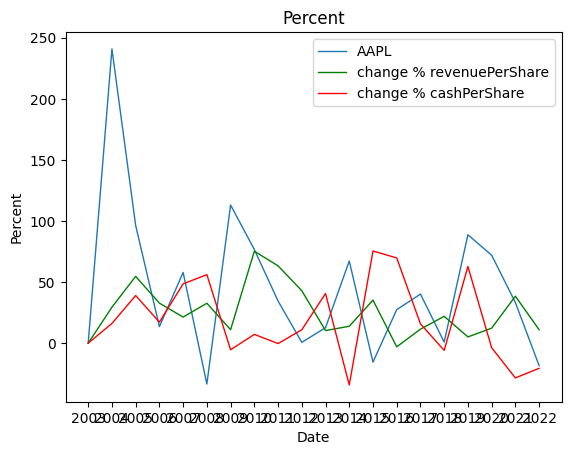

In [21]:

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[x],'g',lw=1, label=x)
plt.plot(df_with_changes_key[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

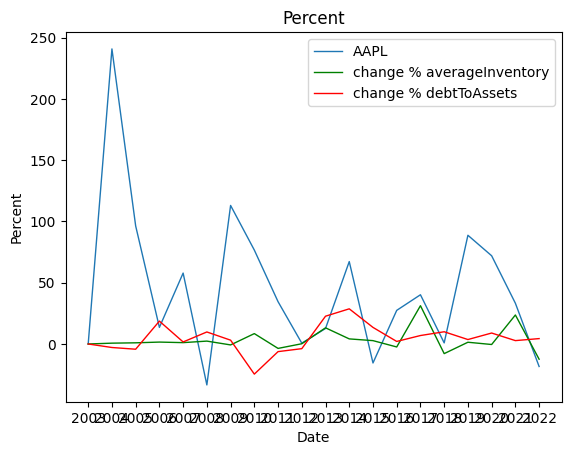

In [22]:


plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[z],'g',lw=1, label=z)
plt.plot(df_with_changes_key[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

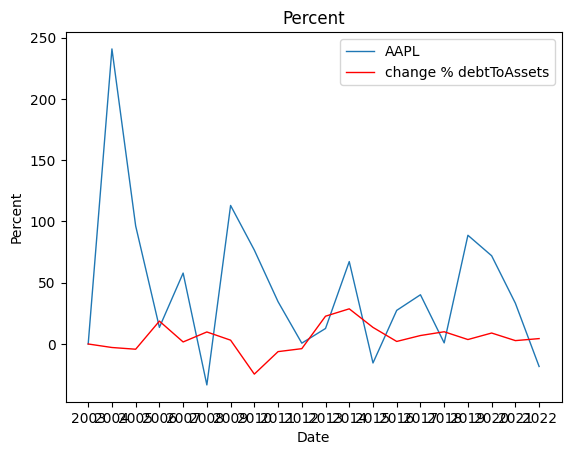

In [23]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
# plt.plot(df_with_changes_key[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes_key[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()

Vizualization income_statement

In [24]:
''' necessary columns '''

is0 = f'{ticker}'
is1 = f'change % {ticker}'
is2 = 'eps'
is3 = 'epsdiluted'
is4 = 'change % eps'
is5 = 'change % epsdiluted'
is6 = 'change % revenue'

In [25]:
# costOfRevenue
# eps
# epsdiluted
# ebitda
# grossProfit
# costOfRevenue
# revenue

In [26]:
df_with_changes_inc_stat = df_with_changes_inc_stat.reindex(index=df_with_changes_inc_stat.index[::-1])

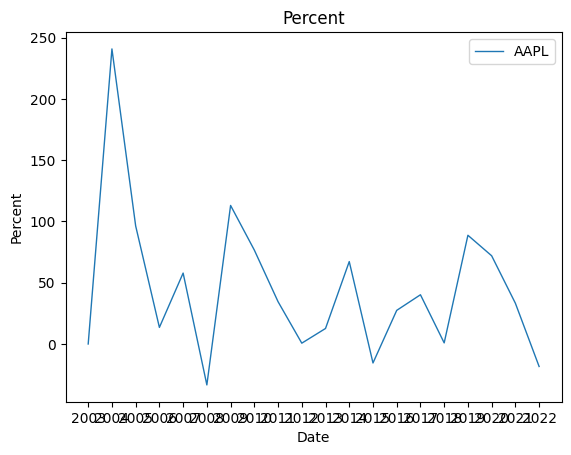

In [27]:


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
plt.plot(df_with_changes_inc_stat[is1],lw=1, label=ticker)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
# plt.plot(df_with_changes_inc_stat[is3],'r', lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

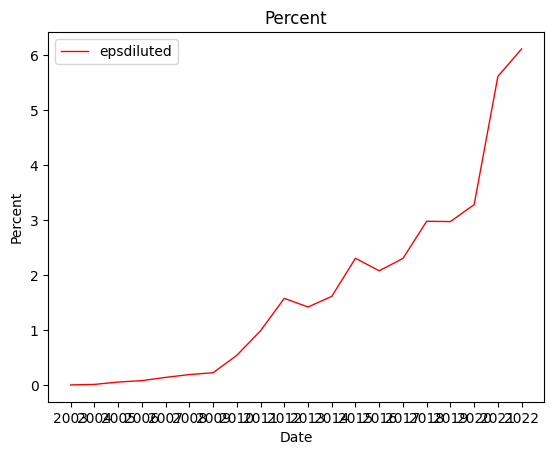

In [28]:


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
# plt.plot(df_with_changes_inc_stat[is1],lw=1, label=is1)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
plt.plot(df_with_changes_inc_stat[is3],'r', lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

dividents

In [29]:
stock_dividend = fa.stock_dividend(ticker, api_key)


def get_date_dividents(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i][0:4]
        df_index[i] = t
        
        

    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df_dividents = get_date_dividents(stock_dividend)
# df_dividents

df_dividents = df_dividents.loc[filt_finish_date:filt_start_date].copy(deep=True)


In [34]:
df_dividents

,label,adjDividend,dividend,recordDate,paymentDate,declarationDate
Date_index,,,,,,
2022,"November 04, 22",0.23,0.23,2022-11-07,2022-11-10,2022-10-27
2022,"August 05, 22",0.23,0.23,2022-08-08,2022-08-11,2022-07-28
2022,"May 06, 22",0.23,0.23,2022-05-09,2022-05-12,2022-04-28
2022,"February 04, 22",0.22,0.22,2022-02-07,2022-02-10,2022-01-27
2021,"November 05, 21",0.22,0.22,2021-11-08,2021-11-11,2021-10-28
2021,"August 06, 21",0.22,0.22,2021-08-09,2021-08-12,2021-07-27
2021,"May 07, 21",0.22,0.22,2021-05-10,2021-05-13,2021-04-28
2021,"February 05, 21",0.205,0.205,2021-02-08,2021-02-11,2021-01-27
2020,"November 06, 20",0.205,0.205,2020-11-09,2020-11-12,2020-10-29


In [30]:
sum_div = df_dividents['dividend'].sum()
sum_div

6.799644999999996

math

In [31]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()

908.8668667145339

In [32]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()+sum_div

915.6665117145338

In [33]:
df_with_changes_inc_stat['change % eps'].sum()

1250.9476777969821